<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/12_demo_of_long_distance_problem_simple_rnn_model_for_distance_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEMO LONG DISTANCE PROBLEM - SIMPLE RNN**

Here Solving the Long Distance Problem.

IMPORT LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BUILD THE DATASET

In [4]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 10)
(5000,)


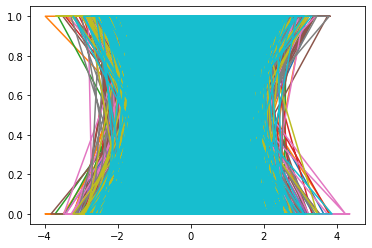

In [5]:
## plot the X and Y
plt.plot(X,Y);

BUILD THE MODEL

In [6]:
## define the inputs
print(X.shape)
## expand the input size to RNN dimension.
inputs = np.expand_dims(X, -1)
print(inputs.shape)

## define the model
i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

(5000, 10)
(5000, 10, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
79/79 [==============================] - 3s 9ms/step - loss: 0.6982 - accuracy: 0.5108 - val_loss: 0.6953 - val_accuracy: 0.5012
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5144 - val_loss: 0.6956 - val_accuracy: 0.4992
Epoch 3/200
79/79 [===

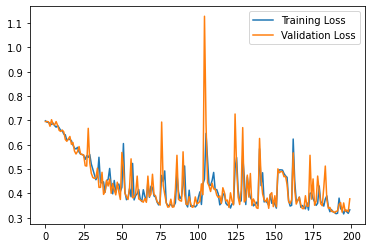

In [7]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

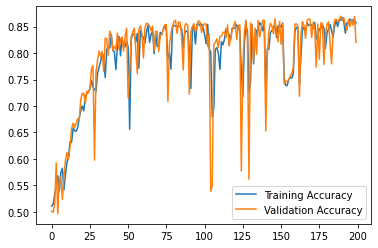

In [8]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

Here in the Notebook we are looking into Long Distance Relationship.
+ Here the Simple RNN have difficulty in Learning the Pattern.

***

NOW RUN THE MODEL FOR INCREASED SEQUENCE LENGTH, INCREASED T = 20

In [9]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 20
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 20)
(5000,)


In [10]:
## define the inputs
print(X.shape)
## expand the input size to RNN dimension.
inputs = np.expand_dims(X, -1)
print(inputs.shape)

## define the model
i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

(5000, 20)
(5000, 20, 1)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
79/79 [==============================] - 2s 12ms/step - loss: 0.6983 - accuracy: 0.4924 - val_loss: 0.6940 - val_accuracy: 0.4968
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6949 - accuracy: 0.5044 - val_loss: 0.6941 - val_accuracy: 0.4940
Epoch 3/200
79/79 [

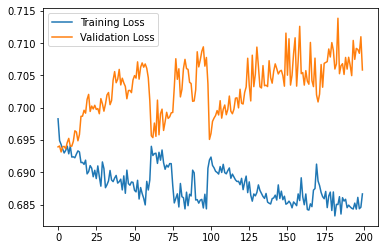

In [11]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

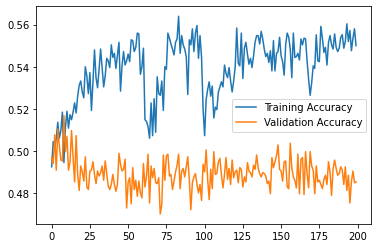

In [12]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

Her the Result is Worse than when T = 10.
+ That is, for long sequence, simple rnn is not able to generalizes well.

***